In [ ]:
import pandas as pd

df = pd.read_csv("company_website_second_round_with_additional_firms.csv")

print("Opened CSV")

Opened CSV


C:\Users\theal\AppData\Local\Temp\ipykernel_68928\2192807919.py:3: DtypeWarning: Columns (300,304,325,328) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("company_website_second_round_with_additional_firms.csv")


In [2]:
keywords = [
    "made in america", "made in u.s.", "made in us", # made in usa and made in us overlap
    "american made", "usa made", "u.s. made", "us made",
    "buy american", "buy usa", "buy america",
    "support america", "support usa", "support u.s.",
    "patriot",
    "choose american", "choose usa", "choose u.s.", "choose america",
    "national pride",
    "usa based", "america based", "american based", "us based", "u.s. based",
    "usa produced", "america produced", "american produced", "us produced", "u.s. produced",
    "usa manufactured", "america manufactured", "american manufactured", "us manufactured", "u.s. manufactured",
    "american worker", "american job",
    "veteran owned", "veteran founded", "founded by veteran",
    "handcrafted in america", "handcrafted in usa", "handcrafted in u.s.", "handcrafted in us",
    "crafted in america", "crafted in u.s.", "crafted in us", # removed "crafted in the usa" due to overlap with crafted in the US
    "america heritage", "america tradition", "america value",
    "icon of america", "icon of usa", "icon of u.s.",
    "america manufactur", "u.s. manufactur"
]


In [3]:
df.drop(df.columns[:14], axis=1, inplace=True)
df.head()

,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,...,1997-07,1997-06,1997-05,1997-04,1997-03,1997-02,1997-01,1996-12,1996-11,1996-10
0,NaN,NaN,NaN,NaN,NaN,NaN,\nGifts for Men | 11 Industries | Gentleman's ...,\nGifts for Men | 11 Industries | Gentleman's ...,\nGifts for Men | 11 Industries | Gentleman's ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",NaN,NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,\nHome - Regal Ware\nWho We Are\nWhy We Work\n...,\nHome - Regal Ware\nWho We Are\nWhy We Work\n...,\nRegal Ware | Enriching Life by Bringing Fami...,NaN,NaN,\nRegal Ware | Enriching Life by Bringing Fami...,NaN,\nRegal Ware | Enriching Life by Bringing Fami...,...,NaN,NaN,NaN,NaN,NaN,NaN,"\nWelcome to Regal Ware, Inc.\nA global leader...","\nWelcome to Regal Ware, Inc.\nA global leader...",NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\nCustom Swim Parkas and Wholesale Fleece Jack...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5189, 325)

In [5]:
columns = list(df.columns)

In [9]:
# Extract the count values for the term frequency IDF portion
term_count = {}

def count_term_existence(keyword):
    import pandas as pd
    print("Processing keyword: ", keyword)
    # Columns indicating years
    term_existence = [0] * len(columns)

    for row in df.itertuples(): # For each website
        previous_value = 0 # Track the previous value
        for column in range(len(columns) - 1, -1, -1): # Go from the earliest time to the latest time.
            if pd.isna(row[column]) or type(row[column]) == int: # Is the value a number or showing a null value?
                term_existence[column] += previous_value # Add the most recent value
            else:
                if keyword in row[column].lower(): # is the keyword in the lowercased version of the text?
                    term_existence[column] += 1 # Yes? then add 1 to the value for this year
                    previous_value = 1 # Yes? Set the previous value to 1
                else:
                    term_existence[column] += previous_value # Keyword isn't there? If it was there in last year(s), include it this year. 

    return {keyword: sum(term_existence)} # Sum the value over all of the different years


In [10]:
document_count = [0] * len(columns) # How many documents are there per year?
for row in df.itertuples():
    previous_value = 0 # Setting the previous value to zero
    for column in range(len(columns) - 1, -1, -1):
        if pd.isna(row[column]) or type(row[column]) == int: # Is the current value NaN/0? Then go back to the most recent value
            document_count[column] += previous_value # Add the previous value (1 or 0)
        else:
            document_count[column] += 1 # Increment the count of documents for this year
            previous_value = 1 # The previous value will be 1 (as there will be a document to represent for every year thereafter)

document_count_sum = sum(document_count)
print(document_count_sum) # Total number of documents

882928


In [11]:
import multiprocess as mp # This is code to paralellize running the processing steps

pool = mp.Pool(processes=4)
results = pool.map(count_term_existence, keywords)
term_count = {}
for result in results:
    term_count.update(result)

NameError: name 'columns' is not defined

In [37]:
import math

def generate_final_value_by_year(data):
    keyword, term_existence = data

    print("Processing keyword: ", keyword)
    adjusted_keyword_count = [0] * len(columns)

    if term_existence == 0: # Skip over if this term wasn't counted in any of the years
        return {keyword: adjusted_keyword_count}
    
    for row in df.itertuples():
        previous_value = 0
        for column in range(len(columns) - 1, -1, -1): # Iterate from least recent to most recent
            if pd.isna(row[column]) or type(row[column]) == int: # Does the current value here not exist?
                adjusted_keyword_count[column] += previous_value # Add in the previous value instead
            else:
                idf = math.log(1 + (document_count_sum/term_existence)) # This is the IDF formula
                keyword_count = row[column].lower().count(keyword) # This is the term frequency within this document
                value = (keyword_count * idf / len(row[column]))*100 # This is the formula

                # keyword_count = row[column].lower().count(keyword) # This is the term frequency within this document (for not using TF-IDF)
                # value = keyword_count # No changes to the value here! (for not using TF-IDF)

                if keyword_count > 0 or value > previous_value: # Is the value greater? Does the keyword count exist
                    adjusted_keyword_count[column] += value # Increment by the value we just got
                    previous_value = value # Set previous value
                else: 
                    adjusted_keyword_count[column] += previous_value # Just use the previous value

    return {keyword: adjusted_keyword_count}

In [38]:
# Run this over all of the different keywords

pool = mp.Pool(processes=6)
results = pool.map(generate_final_value_by_year, ((keyword, term_count[keyword]) for keyword in keywords))
tf_idf_total = {}
for result in results:
    tf_idf_total.update(result)

Processing keyword: us made 
Processing keyword: Processing keyword: Processing keyword: Processing keyword: Processing keyword:    support u.s.made in americabuy america

 
 choose usa
american made
Processing keyword: Processing keyword: Processing keyword: Processing keyword: Processing keyword:      Processing keyword: made in u.s.usa madebuy american patriotsupport america


choose u.s.


Processing keyword: Processing keyword:   made in uschoose americanProcessing keyword: Processing keyword: 
 
 choose americabuy usa

Processing keyword:  support usa
Processing keyword:  u.s. made
Processing keyword:  national pride
Processing keyword:  Processing keyword: american based
 usa produced
Processing keyword:  us produced
Processing keyword:  u.s. produced
Processing keyword:  america manufactured
Processing keyword:  american manufactured
Processing keyword:  u.s. manufactured
Processing keyword: Processing keyword:  Processing keyword:  us manufacturedus based 

america produced
Pr

In [39]:
print(tf_idf_total[keywords[0]])

[85.08718067679324, 85.08718067679324, 84.86255892460171, 85.21696360808949, 84.99784656740387, 85.3306667043261, 86.32629074726346, 86.15819453738628, 85.07323848156612, 84.05459954906041, 84.06081617449863, 83.65999383161521, 83.22408588327775, 84.03793809676861, 84.19328672200304, 84.15538968495787, 83.81303323519518, 84.03201060464356, 83.60780773906596, 83.1412816159201, 82.7860718250327, 82.56312553596001, 82.45129006814149, 81.71037545156295, 77.55000091494219, 77.67865709093039, 77.00572930044436, 77.35335895033184, 76.29979271784683, 76.20355471567956, 75.71173337890268, 75.46048248724556, 75.59287634630515, 74.9945260903555, 74.86433642097982, 73.22621439435599, 73.5877801209785, 73.36258744341778, 74.93970265544745, 73.76018803629394, 71.96129360733202, 71.33283614978251, 70.06707879452318, 69.77554889840779, 69.18442370558658, 68.9016625043523, 69.30379158165806, 69.15598396332202, 68.78886814003724, 69.57077707127411, 68.84712258030376, 68.08804381413078, 67.86334636432134

In [40]:
year_sums = [0] * len(columns)
for keyword in keywords: # Going through all of the keywords
    if type(tf_idf_total[keyword]) == int: # This is a redundant invalid check
        continue
    for column in range(len(columns)): # Go through all of the years
        year_sums[column] += tf_idf_total[keyword][column] # Adding up all the sums per year 
    
for column in range(len(columns)): 
    # print(document_count[column])   
    year_sums[column] /= document_count[column]
print(year_sums[:10])

[0.14635576007368015, 0.14635576007368015, 0.14642530485242491, 0.1462962676844848, 0.14641854348469663, 0.1462883814904153, 0.14579315944743124, 0.1455219673184154, 0.14630718416421767, 0.1438971822472854]


325 [Timestamp('2023-10-01 00:00:00'), Timestamp('2023-09-01 00:00:00'), Timestamp('2023-08-01 00:00:00')]


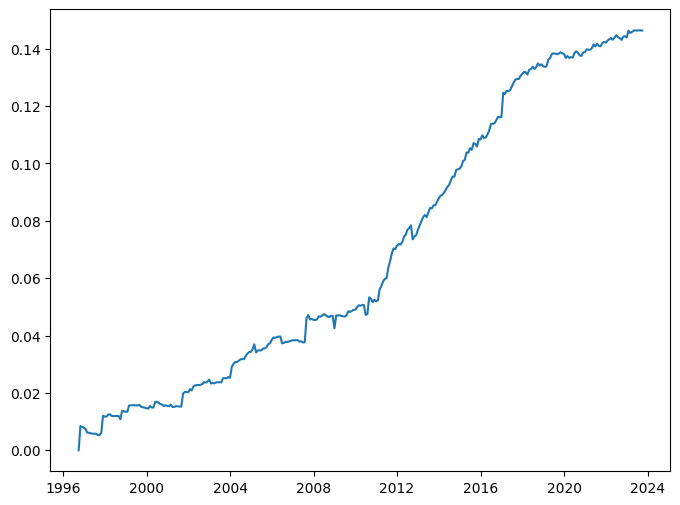

In [41]:
columns = pd.to_datetime(list(df.columns)) # Going back to the original dataframe and getting the columns from there
columns = list(columns) # Turning it from Pandas format to list format

print(len(columns), columns[:3])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(columns, list(year_sums)) # Plotting it!